/tmp/ipykernel_1140/1152175307.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax_graph = plt.subplot(122)
MovieWriter ffmpeg unavailable; using Pillow instead.


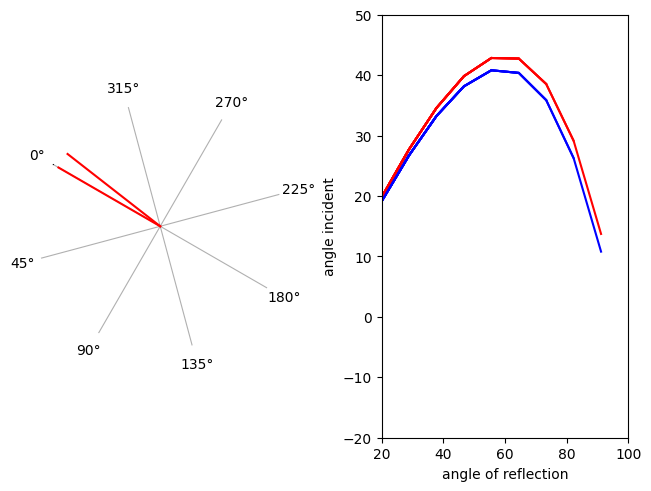

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def get_alpha(theta_i, n):
    theta_r_red = np.arcsin(np.sin(theta_i /180.0 * np.pi)/n) * 180.0/np.pi
    return 4 * theta_r_red - 2 * theta_i

theta_i = np.linspace(20, 100, 500)
# alpha = 4 theta_r - theta_i
# sin(theta_i) = n sin(theta_r)
alpha_red = get_alpha(theta_i, 1.325)
alpha_blue = get_alpha(theta_i, 1.340)
x = np.linspace(-10, 0, 100)
r = np.linspace(0, 10, 100)

fig, ax = plt.subplots(constrained_layout=True)
ax_graph = plt.subplot(122)
ax_graph.set(xlabel='angle of reflection', ylabel='angle incident',
             xlim=[20, 100], ylim=[-20, 50])

ax_diagram = plt.subplot(121, projection='polar')

def update(num, theta_i, alpha_red, alpha_blue, x):
    # Graph
    line_red, = ax_graph.plot(theta_i[:num], alpha_red[:num], color='red')
    line_blue, = ax_graph.plot(theta_i[:num], alpha_blue[:num], color='blue')

    # Diagram
    alpha_below = alpha_red[num] * np.pi / 180.0

    ax_diagram.clear()
    ax_diagram.set_theta_zero_location('N', 60)
    ax_diagram.set_yticklabels([])
    radius_above, = ax_diagram.plot([0] * 100, r, color="red")
    radius_below, = ax_diagram.plot([alpha_below] * 100, r, color="red")
        
    return line_red, line_blue, radius_above, radius_below
    

ani = animation.FuncAnimation(fig, update, len(theta_i), fargs=[theta_i, alpha_red, alpha_blue, x],
                              interval=25, blit=True)
ani.save('/windir/c/Users/debor/Documents/test.gif')
plt.show()

